In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

#other computational libraries
import numpy as np
import pandas as pd
import scipy
import scipy.constants as co
import scipy.stats as ss
import itertools
import pickle

In [2]:
#how to read
#fileObj = open('data/r76-80V-naitrig-100eV-goodchi.pkl', 'rb')
fileObj = open('../example_scripts/data/r76-80V-naitrig-100eV-goodchi-evshift.pkl', 'rb')
exampleObj = pickle.load(fileObj)
fileObj.close()
#print(exampleObj)

In [3]:
import pulseAnalysis as pa

pulse_struct = pa.parseEventList('data/r76-80V-naitrig-100eV-goodchi.txt')

   SeriesNumber  EventNumber
0   72209162200       490759
1   72209162200       590105
2   72209162200       970769
3   72209162200       990193
4   72209162200      1200805
5   72209162200      1920692
6   72209162200      2640676
7   72209162200      3320285
8   72209162200      3470461
9   72209162200      5310198
[72208301829 72208302118 72208311151 72209162200 72209171225 72209172155
 72210191832 72210192240 72210200954 72210251956 72210261049 72210262224
 72210270959]
[550152 610538 620687]
[  70193  340676  530225  580726  920658 1220460 2520826 2560339 2690376
 3360712 3400635 3950868 4010638 4240150 5020188 6020421 6110497 6280605]
[1320198 1630263 1950136 2970369 3650606 3670094]
[ 490759  590105  970769  990193 1200805 1920692 2640676 3320285 3470461
 5310198]
[1500320 1970453 2280315 2920809 3240861 4530720 4950597 5080366]
[1220647 1520104]
[ 500590  680460 1000312 1000698 1430424 1560356 1640702 1690511 1931161]
[ 300587 1451328 1580294 1840013 2331140 2840178 3130642 319

72210192240
300587
[3004 3005 3004 ... 2993 2995 2995]


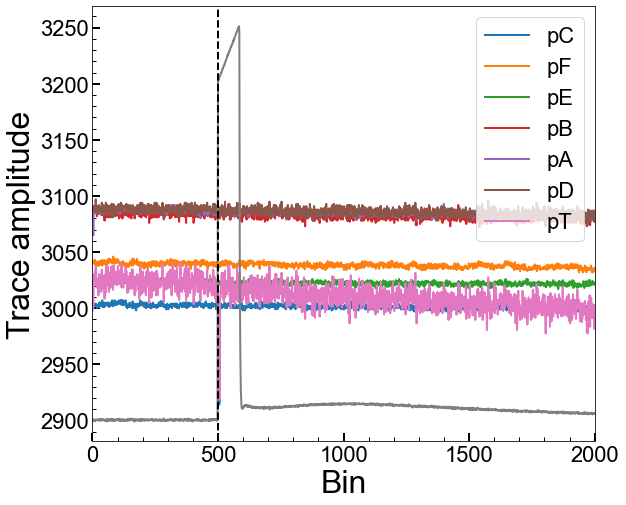

72210262224
730103
[3055 3053 3055 ... 3053 3056 3053]


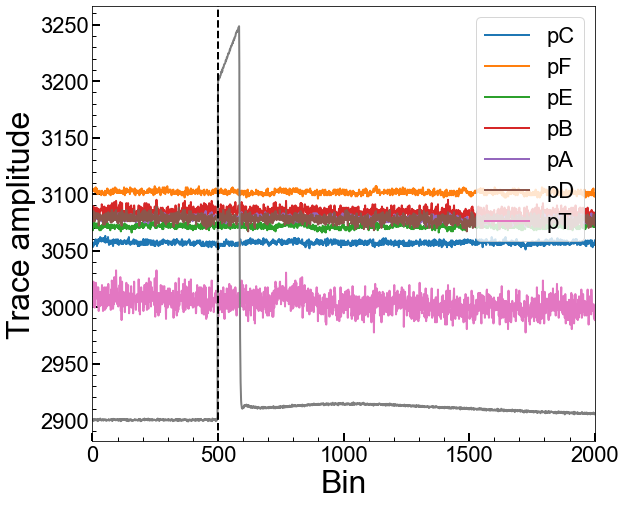

In [7]:
for s in pulse_struct:
    ser=int(s.replace('_',''))
    for ev in pulse_struct[s]:
      
        
      badev1 = (ser==72210192240)&(ev==300587)
      badev2 = (ser==72210262224)&(ev==730103)
        
      if(~badev1)&(~badev2):
        continue
     
      print(ser)
      print(ev)
      fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
      ax1 = axes
      print(exampleObj['Z1']['PA'][ser,ev])
      shownpulses=0

      #plt.subplot(8,12)
      if(not pa.isRailed(exampleObj['Z1']['PA'][ser,ev])):
        shownpulses+=1
        ax1.plot(exampleObj['Z1']['PA'][ser,ev],label="pC") # index 0 corresponds to first event
      if(not pa.isRailed(exampleObj['Z1']['PB'][ser,ev])):
        shownpulses+=1
        ax1.plot(exampleObj['Z1']['PB'][ser,ev],label="pF")
      if(not pa.isRailed(exampleObj['Z1']['PD'][ser,ev])):
        shownpulses+=1
        ax1.plot(exampleObj['Z1']['PD'][ser,ev],label="pE")
      if(not pa.isRailed(exampleObj['Z3']['PA'][ser,ev])):
        shownpulses+=1
        ax1.plot(exampleObj['Z3']['PA'][ser,ev],label="pB") # index 0 corresponds to first event
      if(not pa.isRailed(exampleObj['Z3']['PB'][ser,ev])):
        shownpulses+=1
        ax1.plot(exampleObj['Z3']['PB'][ser,ev],label="pA")
      if(not pa.isRailed(exampleObj['Z3']['PD'][ser,ev])):
        shownpulses+=1
        ax1.plot(exampleObj['Z3']['PD'][ser,ev],label="pD")

      if(shownpulses>0):
        ax1.plot(pa.getPTPulse(exampleObj,ser,ev)+3000,label="pT")

      ax1.plot((exampleObj['Z4']['PA'][ser,ev]/3)+2900-2650)
      #plt.title('PA')
      ax1.legend(loc=1,prop={'size':22})
      ax1.set_xlim(0,2000)
      ax1.set_xlabel('Bin')
      ax1.set_ylabel('Trace amplitude')
      plt.axvline(x=500,color='k',linestyle="--")

      #plt.suptitle('Event 0 on Z1 PA Channels')
      if(shownpulses>0):
        plt.show()